In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import seaborn as sns # visualization
import matplotlib.pyplot as plt

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.
#https://www.kaggle.com/ancientaxe/simple-neural-network-from-scratch-in-python/notebook

In [5]:
# load iris database
data = pd.read_csv('C:\\Anaconda2\\books\\Iris.csv')
data.sample(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
129,130,7.2,3.0,5.8,1.6,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df_norm = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
86,0.666667,0.458333,0.627119,0.583333
17,0.222222,0.625000,0.067797,0.083333
92,0.416667,0.250000,0.508475,0.458333
90,0.333333,0.250000,0.576271,0.458333
105,0.916667,0.416667,0.949153,0.833333


In [8]:
df_norm.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Convert the Species labels to indexes for use with neural network.
Iris-setoso = 0
Iris-versicolor = 1
Iris-virginica = 2

In [9]:
target = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
target.sample(n=5)

,Species
76,1
26,0
125,2
9,0
135,2


In [10]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
89,0.333333,0.208333,0.508475,0.500000,1
97,0.527778,0.375000,0.559322,0.500000,1
50,0.750000,0.500000,0.627119,0.541667,1
64,0.361111,0.375000,0.440678,0.500000,1
55,0.388889,0.333333,0.593220,0.500000,1


Mark some of the data for testing purpose.
We'll test our network on unseen data.

In [11]:
train_test_per = 90/100.0
df['train'] = np.random.rand(len(df)) < train_test_per
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,train
144,0.666667,0.541667,0.796610,1.000000,2,True
72,0.555556,0.208333,0.661017,0.583333,1,True
128,0.583333,0.333333,0.779661,0.833333,2,False
56,0.555556,0.541667,0.627119,0.625000,1,True
87,0.555556,0.125000,0.576271,0.500000,1,True


Separate train and test Data

In [12]:
train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
train.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
29,0.111111,0.500000,0.101695,0.041667,0
97,0.527778,0.375000,0.559322,0.500000,1
138,0.472222,0.416667,0.644068,0.708333,2
27,0.250000,0.625000,0.084746,0.041667,0
25,0.194444,0.416667,0.101695,0.041667,0


In [13]:
test = df[df.train == 0]
test = test.drop('train', axis=1)
test.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
98,0.222222,0.208333,0.338983,0.416667,1
65,0.666667,0.458333,0.576271,0.541667,1
146,0.555556,0.208333,0.677966,0.750000,2
128,0.583333,0.333333,0.779661,0.833333,2
34,0.166667,0.458333,0.084746,0.000000,0


In [14]:
X = train.values[:,:4]
X[:5]

array([[ 0.86111111,  0.33333333,  0.86440678,  0.75      ],
       [ 0.61111111,  0.5       ,  0.69491525,  0.79166667],
       [ 0.58333333,  0.5       ,  0.59322034,  0.58333333],
       [ 0.22222222,  0.625     ,  0.06779661,  0.04166667],
       [ 0.13888889,  0.45833333,  0.10169492,  0.04166667]])

In [15]:
targets = [[1,0,0],[0,1,0],[0,0,1]]
y = np.array([targets[int(x)] for x in train.values[:,4:5]])
y[:5]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

Create backpropagating neural network
Create 3 layers: Input, hidden and Output.
Inputs = length and widths of the species
Output = 3 values, each one indicating a species. ie Values 1, 0, 0 for the output indicates Iris-setosa
w1 is a matrices of weight connecting Input and the hidden layer. Each node in input layer connects to each node in the hidden layer.

Weight are randomized between -1 and 1.

In [17]:
num_inputs = len(X[0])
print(num_inputs)
hidden_layer_neurons = 5
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
print(w1)

4
[[ 0.93405968  0.0944645   0.94536872  0.42963199  0.39545765]
 [-0.56782101  0.95254891 -0.98753949 -0.49403528 -0.13041694]
 [ 0.55876584 -0.60462985  0.72598647  0.96680135 -0.67231552]
 [ 0.19466789 -0.9820278  -0.22685743 -0.91167988  0.91330594]]


w2 are the weights of connections between hidden layer and output layer.


In [18]:
num_outputs = len(y[0])
print(num_outputs)
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
print(w2)

3
[[-0.12770671  0.89795461  0.57261197]
 [ 0.7325786  -0.65366916 -0.85010283]
 [ 0.20148544 -0.66405563  0.46676034]
 [-0.18311228  0.05581765  0.87514317]
 [ 0.04339224 -0.78361323 -0.68355319]]


Train the network by updating the weights using backpropogation.
This is the crux of the network. The layers are fed forward using sigmoid activation function. The weighs are then updated based on error using gradient descent.
Forward Propagation ( use current weights to caluculate output ):
> node activation = output from previous layer (network inputs in case of first layer) * weights
> node output = sigmoid activation function = 1 / ( 1 + exp( node activation ) )

Backpropagation ( update network weights ):
Error calculation ( how far off we are from the expected values ):
> derivative (different for different activation functions) = output * ( 1 - output )
> error (for the last layer) = ( expected - output ) * derivative
> error (for other layers) = ( error calulated previously * that layer's weight ) * derivative
Update weight based on error caculated:
> Weight = weight + ( output * error * learning rate )

In [19]:
# taken from> https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

A Graphical representations of our network will be something like below
The first set of 4 nodes is the input.
The second set of 5 nodes is the hidden layer. 
The last set of 3 nodes is the output layer.

All the nodes of a layer are fully connected to all nodes of the next layer.

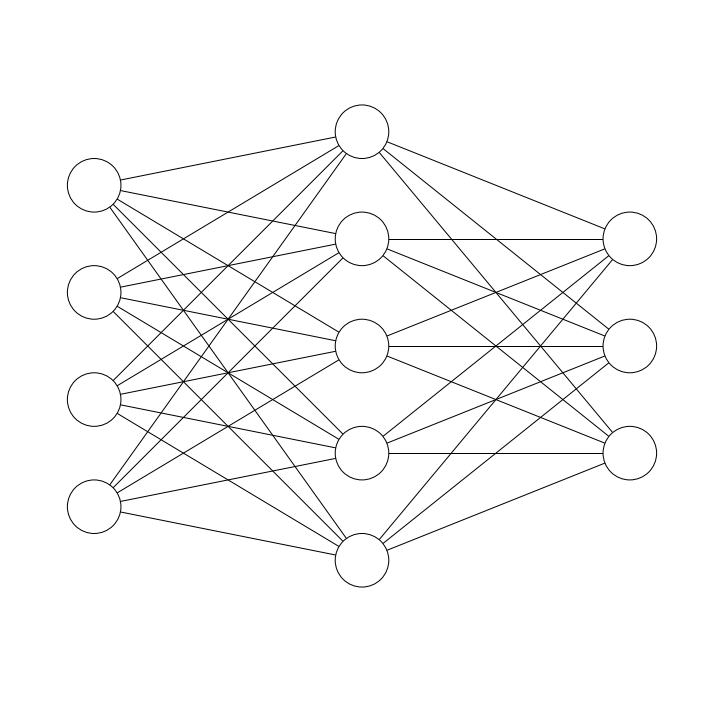

In [20]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 5, 3])

The sigmoid activation function squashes the input values between 0 and 1. This provides a consistant way for the network to deal with outputs.

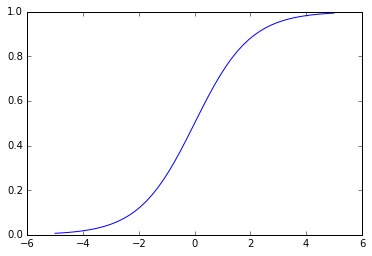

In [21]:
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )


In [22]:
learning_rate = 0.2 # slowly update the network
for epoch in range(50000):
    l1 = 1/(1 + np.exp(-(np.dot(X, w1)))) # sigmoid function
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    er = (abs(y - l2)).mean()
    l2_delta = (y - l2)*(l2 * (1-l2))
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    w2 += l1.T.dot(l2_delta) * learning_rate
    w1 += X.T.dot(l1_delta) * learning_rate
print('Error:', er)

('Error:', 0.044869912787412924)


Test the network for accuracy.
Run the network with the updated weights from training.

In [23]:
X = test.values[:,:4]
y = np.array([targets[int(x)] for x in test.values[:,4:5]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

np.round(l2,3)


array([[ 1.   ,  0.   ,  0.   ],
       [ 1.   ,  0.   ,  0.   ],
       [ 1.   ,  0.   ,  0.   ],
       [ 1.   ,  0.   ,  0.   ],
       [ 1.   ,  0.   ,  0.   ],
       [ 1.   ,  0.   ,  0.   ],
       [ 1.   ,  0.   ,  0.   ],
       [ 0.   ,  0.931,  0.044],
       [ 0.   ,  1.   ,  0.   ],
       [ 0.   ,  0.079,  0.937],
       [ 0.   ,  1.   ,  0.   ],
       [ 0.   ,  0.614,  0.344],
       [ 0.   ,  0.998,  0.001],
       [ 0.   ,  0.036,  0.975],
       [ 0.   ,  0.039,  0.973],
       [ 0.   ,  0.106,  0.913]])

From the above maxtrix we take the maximum value (per row), which forms our predictions...

In [25]:
yp = np.argmax(l2, axis=1) # prediction
res = yp == np.argmax(y, axis=1)
correct = np.sum(res)/len(res)
print("The correct values is ",correct)

testres = test[['Species']].replace([0,1,2], ['Iris-setosa','Iris-versicolor','Iris-virginica'])

testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction'].replace([0,1,2], ['Iris-setosa','Iris-versicolor','Iris-virginica'])

print(testres)
print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')


('The correct values is ', 0)
             Species       Prediction
2        Iris-setosa      Iris-setosa
21       Iris-setosa      Iris-setosa
22       Iris-setosa      Iris-setosa
32       Iris-setosa      Iris-setosa
34       Iris-setosa      Iris-setosa
38       Iris-setosa      Iris-setosa
48       Iris-setosa      Iris-setosa
65   Iris-versicolor  Iris-versicolor
66   Iris-versicolor  Iris-versicolor
83   Iris-versicolor   Iris-virginica
85   Iris-versicolor  Iris-versicolor
86   Iris-versicolor  Iris-versicolor
98   Iris-versicolor  Iris-versicolor
115   Iris-virginica   Iris-virginica
128   Iris-virginica   Iris-virginica
146   Iris-virginica   Iris-virginica
('Correct:', 15, '/', 16, ':', 0, '%')
